In [2]:
from shapely.geometry import Point
import seaborn as sns
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [3]:
Covid_Vacine_ByZip = pd.read_csv('COVID_CountByZipPerDate 03292021.csv')


In [4]:
Covid_Vacine_ByZip.head(10)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1
5,3/11/2020,37210.0,1
6,3/11/2020,37212.0,2
7,3/11/2020,37214.0,1
8,3/11/2020,37215.0,3
9,3/12/2020,NaN,1


In [14]:
Vaccine_protocol = pd.read_csv ('vaccine_with_protocol.csv')

In [12]:
Vaccine_protocol.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [19]:
Vaccine_filter = Vaccine_protocol[Vaccine_protocol.dose_nbr == 1.0]
Vaccine_filter.head()
Vaccine_filter


,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot
5,2020-12-17,37013.0,16.0,1.0,two-shot
...,...,...,...,...,...
6686,2021-04-07,37221.0,81.0,1.0,two-shot
6687,2021-04-07,37221.0,2.0,1.0,one-shot
6689,2021-04-07,37228.0,9.0,1.0,two-shot
6691,2021-04-07,NaN,8.0,1.0,two-shot


In [7]:
Covid_Vacine_ByZip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [8]:
HH_Inc = pd.read_csv('HH_Inc.csv')

In [9]:
HH_Inc.head()



,name,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",Unnamed: 17
0,37013.0,35597,1424,1023,1197,1751,1647,1685,1748,1937,1748,3956,4510,5507,3547,1703,1212,1002.0
1,37015.0,6673,421,256,115,415,365,452,350,277,323,719,903,903,639,294,157,84.0
2,37027.0,19950,460,173,246,250,254,250,316,538,472,597,1235,1861,2167,1688,2837,6606.0
3,37062.0,4040,119,122,138,140,123,124,121,216,140,329,569,645,468,342,286,158.0
4,37064.0,21640,771,302,623,512,609,630,721,495,567,1479,1784,2293,2338,2265,2394,3857.0


In [10]:
#Andrew's codes to extract those addtional files to be merged into the covid data 

income_data = pd.read_excel("data/household_income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
income_data = income_data[income_data.columns.drop(list(income_data.filter(regex='Error')))]
income_data.columns = income_data.columns.droplevel(1)
income_clean = income_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)

#T in the last code to mean Transpose 

FileNotFoundError: [Errno 2] No such file or directory: 'data/household_income.xlsx'

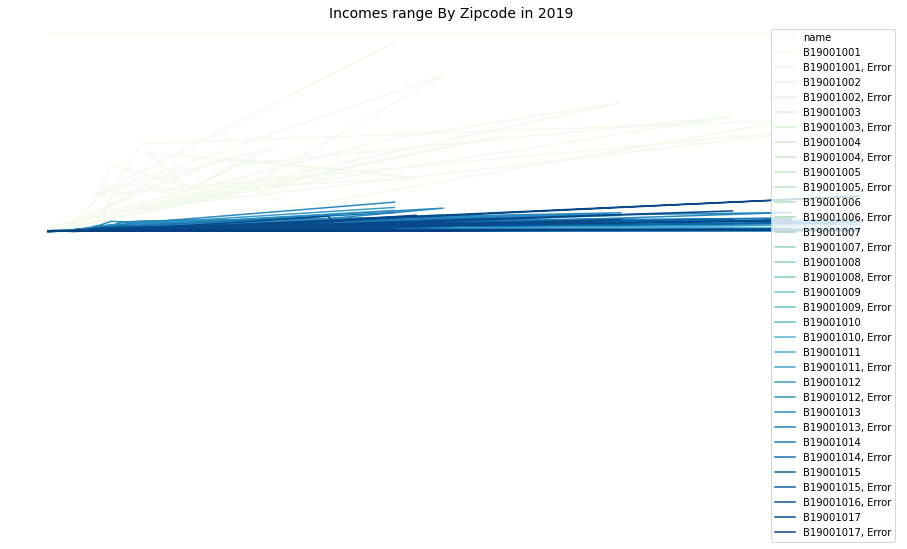

In [25]:
fig, ax = plt.subplots(figsize=(16,4))
HH_Inc.plot('B19001016', 
              cmap = 'GnBu', 
             # edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Incomes range By Zipcode in 2019 ', fontsize = 14)
ax.axis('off');



In [38]:
zip = pd.merge(left = Covid_Vacine_ByZip, right = HH_Inc, 
                    left_on = 'Zip', right_on = 'name')
zip.head()


KeyError: 'name'

In [24]:
Vaccine_protocol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [25]:
Covid_Vacine_ByZip.isnull().sum()


Specimen Collection Date      0
Zip                         376
Cases                         0
dtype: int64

In [26]:
Vaccine_protocol.isnull().sum()

vacc_date        0
zipcode        232
count_given      8
dose_nbr         8
protocol         0
dtype: int64

In [27]:
Covid_Vacine_ByZip.describe()

,Zip,Cases
count,8456.000000,8832.000000
mean,37177.833254,10.599977
std,61.642481,15.487583
min,37013.000000,1.000000
25%,37189.000000,2.000000
50%,37208.000000,5.000000
75%,37215.000000,13.000000
max,37238.000000,272.000000


In [14]:
Covid_Vacine_ByZip.Zip.nunique()

31

In [34]:
#Covid_Vacine_ByZip.groupby(by=Covid_Vacine_ByZip.Zip, axis=0).sum()

most_vax_given = Vaccine_protocol.groupby('zipcode')['count_given'].sum()

print(most_vax_given)

zipcode
37013.0    27167.0
37027.0      506.0
37069.0       89.0
37072.0    13108.0
37076.0    16855.0
37080.0     3078.0
37115.0    12827.0
37138.0    10873.0
37189.0     1650.0
37201.0      756.0
37203.0    11678.0
37204.0     9723.0
37205.0    24451.0
37206.0    14310.0
37207.0    13888.0
37208.0     8262.0
37209.0    20553.0
37210.0     5493.0
37211.0    28477.0
37212.0    10877.0
37213.0      102.0
37214.0    13573.0
37215.0    19915.0
37216.0    10253.0
37217.0     8613.0
37218.0     6987.0
37219.0      891.0
37220.0     5190.0
37221.0    27622.0
37228.0     1040.0
37238.0        5.0
Name: count_given, dtype: float64


<AxesSubplot:xlabel='count_given'>

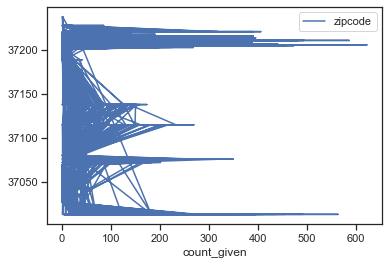

In [58]:
Vaccine_protocol.plot(x='count_given',y='zipcode')